# Image Processing

* Online access to large collections of images from space telescopes is provided by the Barbara A. Mikulski Archive for Space Telescopes (MAST) of NASA, including the legacy archive of the famous Hubble Space Telescope (HST): https://archive.stsci.edu

* For MAST Data Store: https://archive.stsci.edu/prepds/m51/datalist.html

* The CCD cameras used in astronomical telescopes are colour-blind. Every pixel simply counts the number of electrons created by incident photons, regardless of their wavelength. However, the sensitivity of the device is wavelength-dependent.

* In order to reconstruct a color image, we need at least three images taken with different wavelength filters. The image data from the three filters allow us to compose an image using the RGB color system.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from PIL import Image
plt.style.use("dark_background")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/driveFiles")

Mounted at /content/driveFiles


**for real data:**

- M-51 B: https://drive.google.com/file/d/1mC6tl47ogFRO8gevyfvKyLH7XqlEJ4Rm/view?usp=sharing

- M-51 H: https://drive.google.com/file/d/1zBRWiZQx4GX8FFSKfHPT0lOGgTblPjR3/view?usp=sharing

- M-51 V: https://drive.google.com/file/d/1sIkS1t8k1tfgZAO3s71b_Zvb4yX4ZeXy/view?usp=sharing

In the following, we select the image data from:
- the blue (435 nm)
- green/visual (555 nm)
- red/Hα (658 nm) filters

(in the following alsocalled channels)

In [4]:
m51BPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_b_s20_drz_sci.fits"
m51HPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_h_s20_drz_sci.fits"
m51VPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_v_s20_drz_sci.fits"

In [21]:
m51B = fits.open(m51BPath)
m51H = fits.open(m51HPath)
m51V = fits.open(m51VPath)

## M-51 H Example

In [6]:
m51H.info()

Filename: /content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_h_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1691   (2150, 3050)   float32   


In [9]:
data = m51H[0].data # image data
m51H.close()

In [10]:
dataFlatten = data.flatten()

**Since the bin counts N differ by orders of magnitude, we use a logarithmic scale**

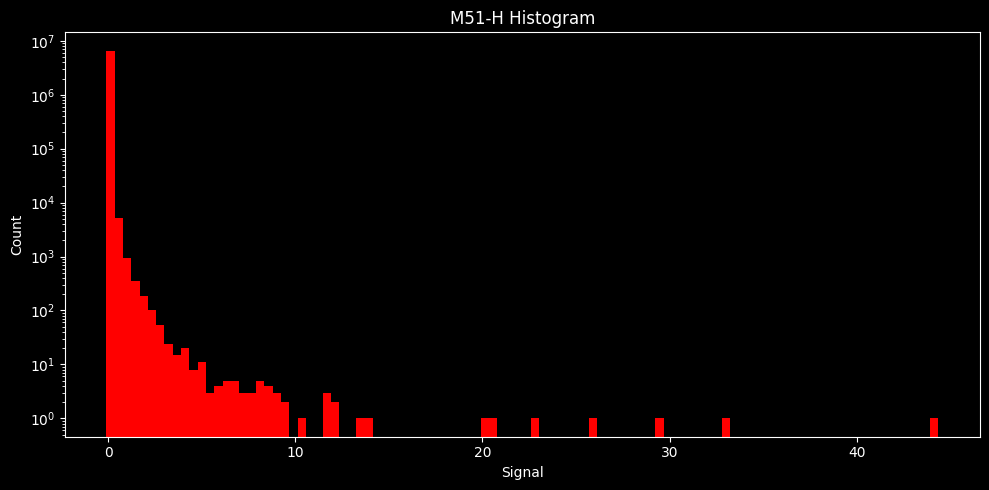

In [13]:
plt.figure(figsize=(10,5))
plt.title("M51-H Histogram")
plt.hist(dataFlatten,log=True,bins=100,color="red")
plt.xlabel("Signal")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**The histogram shows that by far the largest number of pixels has a signal close to 0, with just a small number of individual readings larger than 5**

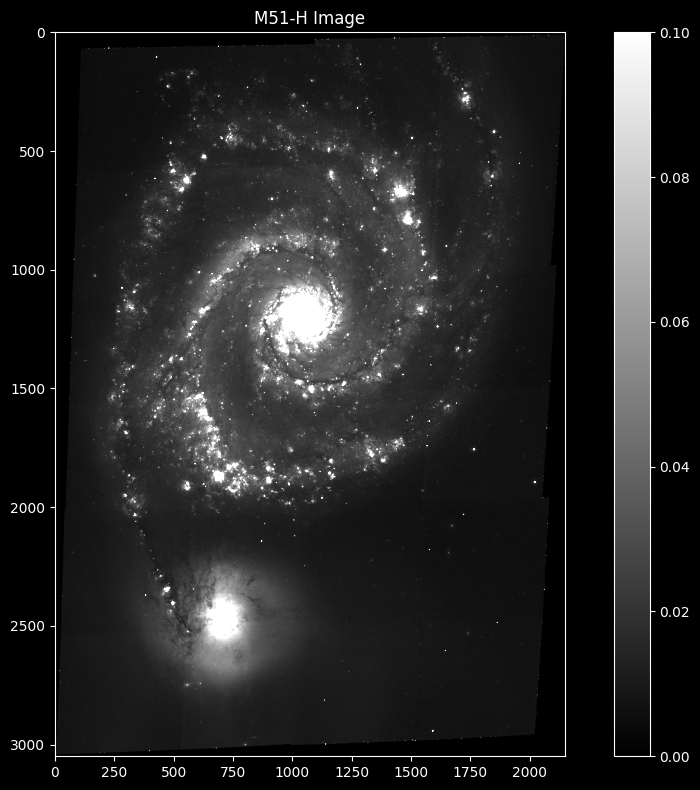

In [14]:
plt.figure(figsize=(10,8))
plt.title("M51-H Image")
plt.imshow(data,cmap="gray")
plt.clim(0,0.1)
plt.colorbar()
plt.tight_layout()
plt.show()

**By default, the range between the minimum and maximum is mapped to colors. This would result in an entirely black image as most values are small.**
> For this reason, we set reasonable limits with `clim()`

**The image that begins to emerge in figure is arguably one of the most popular images of a spiral galaxy, sharing many similarities with our own home galaxy, except for the small companion that causes some tidal disruption of the outer spiral arms. However, it still lacks the beautiful light blue of its spiral arms, interlaced by dark dust lanes and reddish star-forming regions.**

## M-51 V & M-51 B & M51 H Example - RGB

In [15]:
m51V.info()

Filename: /content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_v_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1763   (2150, 3050)   float32   


In [17]:
m51B.info()

Filename: /content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/image_data/h_m51_b_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1763   (2150, 3050)   float32   


In [22]:
dataV = m51V[0].data
m51V.close()

In [25]:
dataV.shape

(3050, 2150)

In [23]:
dataB = m51B[0].data
m51B.close()

In [24]:
dataB.shape

(3050, 2150)

In [40]:
alpha = 0.10
m51rgb = np.zeros([dataV.shape[1],dataV.shape[0],3]) # 3-channel

In [41]:
m51rgb[:,:,0] = data.transpose() / np.mean(data)
m51rgb[:,:,1] = dataV.transpose() / np.mean(dataV)
m51rgb[:,:,2] = dataB.transpose() / np.mean(dataB)

In [42]:
m51rgb *= 255*alpha

**We divide the arrays by the mean values in the three channels and multiply by 255. Moreover, we incorporate a factor alpha that allows us to shift all channels at once, allowing us to control the brightness of the image.**

In [43]:
m51rgb = np.where(m51rgb > 255,255,m51rgb)

**The RGB data are collected in a new, three-dimensional array, where the third dimension spans the red, green, and blue channels. The first two indices specify the position of a pixel, where we have swapped the horizontal and vertical directions by transposing the two-dimensional arrays containing the raw data. As a final step, we cut off at 255 using.**

In [44]:
img = Image.fromarray(m51rgb.astype(np.uint8))
img.show()
img.save("M51_RGB.png")

In [45]:
import matplotlib.image as mpimg

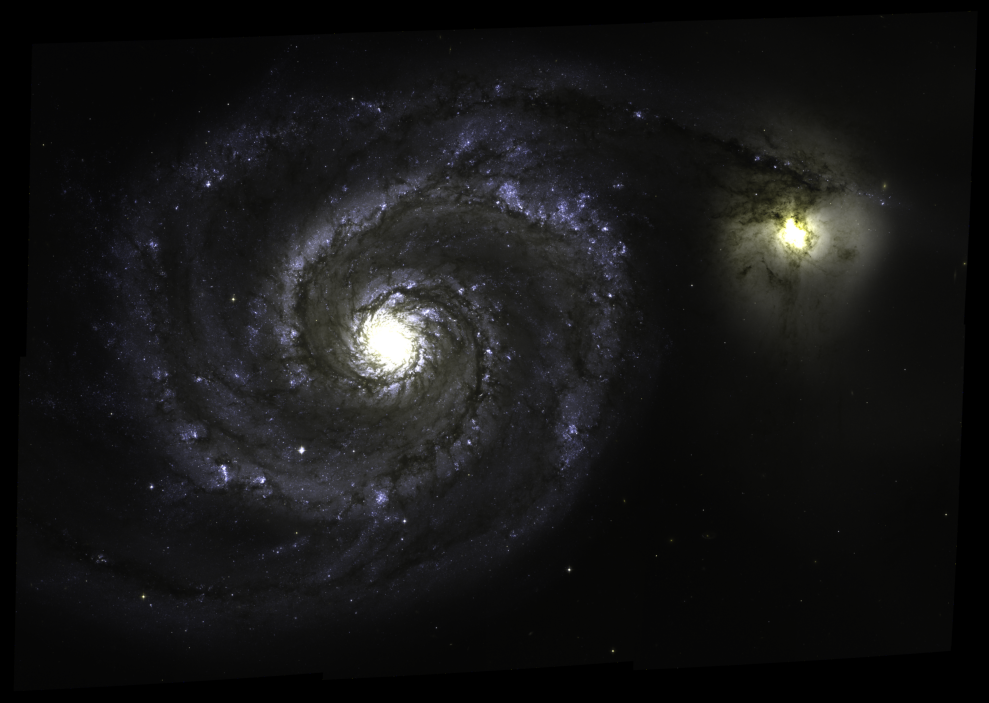

In [46]:
plt.figure(figsize=(10,10))
img = mpimg.imread("/content/M51_RGB.png")
plt.imshow(img)
plt.axis("off")
plt.tight_layout()
plt.show()